# 🏎️ Formula 1 Data Analysis Project  

### 📌 Introduction  
Formula 1, one of the most thrilling and complex sports in the world, has undergone constant evolution over the decades. From the dominance of teams and drivers in different eras to sponsorship strategies in key events like the Monaco Grand Prix, data analysis plays a crucial role in understanding the dynamics of this sport. 🚀  

This notebook focuses on extracting, transforming, and analyzing historical Formula 1 data. Through an **ETL process (Extract, Transform, Load)** followed by **Exploratory Data Analysis (EDA)**, we will uncover key insights about the sport’s past and present.  

### 🔍 Project Goals  
Our analysis will be structured around two key questions that highlight different aspects of Formula 1:  

#### 🏆 Topic 1: Dominance of Teams and Drivers Across Eras  
**Which teams have dominated different eras of Formula 1?**  
Analyzing historical performance by decades or defined periods. *(Sports Analytics)*  

#### 🎯 Topic 2: Relationship Between Drivers, Teams, and Circuits  
**Imagine a marketing department hires us to determine the best sponsorship strategy for the Monaco Grand Prix.**  
They want to sponsor the most likely winner but are unsure whether to choose a specific team or a driver.  
Let's analyze this scenario. *(Media & Sponsorship Analytics)*  


By answering these questions, we aim to provide valuable insights into Formula 1 performance trends and decision-making strategies.  

### About the Dataset

For this project, we will be working with the [Formula 1 World Championship (1950–2020)](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020) dataset, available on Kaggle. This dataset provides a comprehensive historical record of Formula 1 over seven decades, covering drivers, constructors, circuits, races, and results.

From the available files, the following **CSV datasets** will be used:

- **drivers** → detailed information about each driver.  
- **races** → historical race calendar with location and date.  
- **results** → race results for each driver in every Grand Prix.  
- **circuits** → data about the circuits where the races took place.  
- **constructors** → information about the participating constructors (teams).  

Through an **ETL process (Extract, Transform, Load)**, these CSV files will be merged into a single consolidated **DataFrame**, which will then serve as the foundation for the analysis and to answer the research questions defined in the project objectives.


🚀 Let’s dive into the data!

## ETL

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
drivers = pd.read_csv('https://raw.githubusercontent.com/Ezegarcia07/F1/refs/heads/main/drivers.csv')
races = pd.read_csv('https://raw.githubusercontent.com/Ezegarcia07/F1/refs/heads/main/races.csv')
results = pd.read_csv('https://raw.githubusercontent.com/Ezegarcia07/F1/refs/heads/main/results%5B1%5D.csv')
circuits = pd.read_csv("https://raw.githubusercontent.com/Ezegarcia07/F1/refs/heads/main/circuits.csv")
constructors = pd.read_csv("https://raw.githubusercontent.com/Ezegarcia07/F1/refs/heads/main/constructors.csv")

##### - We start with a general overview of each dataframe using the `head()` method. 

In [4]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [6]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [7]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [8]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


We identify columns like `raceId`, `resultId`, `driverId`, and `constructorId` as primary keys, essential for merging datasets. Before combining tables, we analyze each separately to clean null or inconsistent data, ensuring accuracy in our final dataset.  

In [9]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [10]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     859 non-null    int64 
 1   driverRef    859 non-null    object
 2   number       859 non-null    object
 3   code         859 non-null    object
 4   forename     859 non-null    object
 5   surname      859 non-null    object
 6   dob          859 non-null    object
 7   nationality  859 non-null    object
 8   url          859 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.5+ KB


At first glance, we notice an inconsistency in the **"number"** column: for example, `driverId` 2 (Heidfeld) has a value of `"\N"`, which indicates that no number was assigned. Although `drivers.info()` does not show any null values, this pattern suggests that `"\N"` is being used as a placeholder for missing data rather than a true `NaN`.

Knowing this, it is important to check each DataFrame to identify whether other columns also contain missing values represented in this way. Our cleaning process will therefore follow these steps:

1. **Drop irrelevant columns** that do not contribute to the project objectives.  
2. **Inspect the remaining columns** to verify whether they contain values like `"\N"` that should be treated as nulls.  

In [11]:
drivers.columns

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

After reviewing the columns, we identified some that are unnecessary or irrelevant to our analysis. We will remove the following:  

- **"number"**, **"code"** and **"url"** – They don't provide meaningful insights for our questions.  
- **"driverRef"** – Redundant, as we already have "name," "surname," and "id" to identify drivers.  
- **"dob"** (date of birth) and **"nationality"** – Not relevant to our analysis.  

Removing these columns simplifies the dataset, allowing us to focus on the most important data for our research.  

In [12]:
drivers_filtered = drivers.drop(columns=['number', "code", 'driverRef', 'url', 'dob',
       'nationality'])
drivers_filtered.head()

,driverId,forename,surname
0,1,Lewis,Hamilton
1,2,Nick,Heidfeld
2,3,Nico,Rosberg
3,4,Fernando,Alonso
4,5,Heikki,Kovalainen


In [13]:
drivers_filtered.nunique()

driverId    859
forename    478
surname     800
dtype: int64

Let's check for Null Values

In [14]:
columns_with_backslash_n = drivers_filtered.columns[drivers_filtered.apply(lambda col: col.astype(str).str.contains(r'\\N', na=False).any())]
columns_with_backslash_n

Index([], dtype='object')

No null values were found.  

The final modification we will apply to this DataFrame is to **merge the "forename" and "surname" columns** into a single column named **"name"**. This will simplify future joins with other tables and improve overall efficiency.  

After creating the new "name" column, we will **drop the original "forename" and "surname" columns**, as they will no longer be needed.


In [15]:
drivers_filtered["name"]=drivers_filtered["forename"]+" "+drivers_filtered["surname"]
drivers_filtered.drop(columns=["forename","surname"], inplace=True)
drivers_filtered.sample(5)

,driverId,name
432,433,Walt Hansgen
490,490,Geoff Duke
297,298,Gijs van Lennep
590,590,Stuart Lewis-Evans
303,304,Denny Hulme


##### Moving on to the Next DataFrame: *races*

In [16]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [17]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1125 non-null   int64 
 1   year         1125 non-null   int64 
 2   round        1125 non-null   int64 
 3   circuitId    1125 non-null   int64 
 4   name         1125 non-null   object
 5   date         1125 non-null   object
 6   time         1125 non-null   object
 7   url          1125 non-null   object
 8   fp1_date     1125 non-null   object
 9   fp1_time     1125 non-null   object
 10  fp2_date     1125 non-null   object
 11  fp2_time     1125 non-null   object
 12  fp3_date     1125 non-null   object
 13  fp3_time     1125 non-null   object
 14  quali_date   1125 non-null   object
 15  quali_time   1125 non-null   object
 16  sprint_date  1125 non-null   object
 17  sprint_time  1125 non-null   object
dtypes: int64(4), object(14)
memory usage: 158.3+ KB


At first glance, the **races** DataFrame contains 18 columns. We can already identify some columns with null values, as well as several columns that are not relevant to the objectives of our study. These will need to be reviewed and cleaned before proceeding with the analysis.


In [18]:
races.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

There are no null values in any column, as we know `\N` is used to represent those. We also notice some columns that won't contribute to our analysis, so we will proceed to drop them. These columns are: 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'round', 'time', 'date'.


In [19]:
races_filtered = races.drop(columns=['url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'round', 'time', 'date'])
races_filtered.head()

,raceId,year,circuitId,name
0,1,2009,1,Australian Grand Prix
1,2,2009,2,Malaysian Grand Prix
2,3,2009,17,Chinese Grand Prix
3,4,2009,3,Bahrain Grand Prix
4,5,2009,4,Spanish Grand Prix


In [20]:
races_filtered.nunique()

raceId       1125
year           75
circuitId      77
name           54
dtype: int64

In [21]:
columns_with_backslash_n2 = races_filtered.columns[races_filtered.apply(lambda col: col.astype(str).str.contains(r'\\N', na=False).any())]
columns_with_backslash_n2


Index([], dtype='object')

In [22]:
races_filtered.sample(5)

,raceId,year,circuitId,name
628,629,1972,14,Italian Grand Prix
944,957,2016,9,British Grand Prix
70,71,2005,1,Australian Grand Prix
853,855,2011,22,Japanese Grand Prix
946,959,2016,10,German Grand Prix


##### Now, let's move on to the "results" dataframe.

In [23]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [24]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26519 entries, 0 to 26518
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26519 non-null  int64  
 1   raceId           26519 non-null  int64  
 2   driverId         26519 non-null  int64  
 3   constructorId    26519 non-null  int64  
 4   number           26519 non-null  object 
 5   grid             26519 non-null  int64  
 6   position         26519 non-null  object 
 7   positionText     26519 non-null  object 
 8   positionOrder    26519 non-null  int64  
 9   points           26519 non-null  float64
 10  laps             26519 non-null  int64  
 11  time             26519 non-null  object 
 12  milliseconds     26519 non-null  object 
 13  fastestLap       26519 non-null  object 
 14  rank             26519 non-null  object 
 15  fastestLapTime   26519 non-null  object 
 16  fastestLapSpeed  26519 non-null  object 
 17  statusId    

In [25]:
results.nunique()

resultId           26519
raceId              1113
driverId             859
constructorId        211
number               130
grid                  35
position              34
positionText          39
positionOrder         39
points                39
laps                 172
time                7272
milliseconds        7493
fastestLap            81
rank                  26
fastestLapTime      7298
fastestLapSpeed     7514
statusId             137
dtype: int64

In [26]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

Following our initial questions that guided the analysis, the data that interests us the most is related to positioning, points, and IDs. Therefore, we will remove the following columns: 'position', 'positionOrder' (We have "positionText", which reflects the position after possible penalties and disqualifications), 'number', 'laps', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId'.

In [27]:
results_filtered = results.drop(columns=['position', 'positionOrder', 'number', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'])
results_filtered.sample(5)

,resultId,raceId,driverId,constructorId,grid,positionText,points
25444,25450,1076,846,1,4,5,10.0
21293,21296,862,817,5,17,17,0.0
3434,3435,180,25,22,11,R,0.0
7099,7100,323,127,41,12,R,0.0
11577,11578,484,173,32,10,5,2.0


Let's check if there are any "null" values by searching for the `\N` value in the new dataframe.

In [28]:
columns_with_backslash_n3 = results_filtered.columns[results_filtered.apply(lambda col: col.astype(str).str.contains(r'\\N', na=False).any())]
columns_with_backslash_n3

Index([], dtype='object')

There are no null values, so we consider the cleaning process for this dataframe completed.

##### Let's proceed to analyze the next dataframe, "circuits."


In [29]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [30]:
circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     int64  
 8   url         77 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.5+ KB


In [31]:
circuits.columns

Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url'],
      dtype='object')

No null values at first glance. Some columns are unnecessary: 'circuitRef', 'lat', 'lng', 'alt', 'url', 'location', 'country'. You may wonder, why 'location' and 'country'? The exact location isn't useful for us, and when we merge with the other dataframe, we will already have the country.


In [32]:
circuits_filtered = circuits.drop(columns=['circuitRef', 'lat', 'lng', 'alt', 'url','location', 'country'])
circuits_filtered.sample(5)

,circuitId,name
42,43,Long Beach
74,77,Jeddah Corniche Circuit
31,32,Autódromo Hermanos Rodríguez
47,48,Mosport International Raceway
11,12,Valencia Street Circuit


We verify the presence of `\N` to check for any null values in the dataframe.


In [33]:
columns_with_backslash_n4 = circuits_filtered.columns[circuits_filtered.apply(lambda col: col.astype(str).str.contains(r'\\N', na=False).any())]
columns_with_backslash_n4

Index([], dtype='object')

##### Now, let's move on to the last dataframe, "constructors."


In [34]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [35]:
constructors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   212 non-null    int64 
 1   constructorRef  212 non-null    object
 2   name            212 non-null    object
 3   nationality     212 non-null    object
 4   url             212 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


We can quickly drop some columns and then verify if there are any null values.


In [36]:
constructors_filtered = constructors.drop(columns=['constructorRef', 'url', "nationality"])
constructors_filtered.sample(5)

,constructorId,name
183,186,Cooper-Ford
86,88,Eagle
211,215,RB F1 Team
156,158,Rae
190,193,Cooper-ATS


In [37]:
columns_with_backslash_n5 = constructors_filtered.columns[constructors_filtered.apply(lambda col: col.astype(str).str.contains(r'\\N', na=False).any())]
columns_with_backslash_n5  

Index([], dtype='object')

##### We have completed the initial analysis and data cleaning of the dataframes. Now, let's continue with the combination of these dataframes using the `merge` method.  

First, we will merge the **`constructors_filtered`**, **`drivers_filtered`**, and **`results_filtered`** DataFrames. The goal of this merge is to **replace the `driverId` column with the driver's name** and the **`constructorId` column with the team's name**, making the dataset more readable and easier to analyze.



In [38]:
results_completed = pd.merge(results_filtered, drivers_filtered, on="driverId", how="inner")
results_completed.head()

,resultId,raceId,driverId,constructorId,grid,positionText,points,name
0,1,18,1,1,1,1,10.0,Lewis Hamilton
1,2,18,2,2,5,2,8.0,Nick Heidfeld
2,3,18,3,3,7,3,6.0,Nico Rosberg
3,4,18,4,4,11,4,5.0,Fernando Alonso
4,5,18,5,1,3,5,4.0,Heikki Kovalainen


In [39]:
results_completed = pd.merge(results_completed, constructors_filtered, on="constructorId", how="inner")
results_completed.head()

,resultId,raceId,driverId,constructorId,grid,positionText,points,name_x,name_y
0,1,18,1,1,1,1,10.0,Lewis Hamilton,McLaren
1,2,18,2,2,5,2,8.0,Nick Heidfeld,BMW Sauber
2,3,18,3,3,7,3,6.0,Nico Rosberg,Williams
3,4,18,4,4,11,4,5.0,Fernando Alonso,Renault
4,5,18,5,1,3,5,4.0,Heikki Kovalainen,McLaren


We can observe that there are slight issues with the names of the columns we've added. They're not major problems, but for better efficiency and comprehension, we will change them.


In [40]:
results_completed = results_completed.rename(columns={"name_x":"driverName", "name_y":"constructorName"})
results_completed.head()

,resultId,raceId,driverId,constructorId,grid,positionText,points,driverName,constructorName
0,1,18,1,1,1,1,10.0,Lewis Hamilton,McLaren
1,2,18,2,2,5,2,8.0,Nick Heidfeld,BMW Sauber
2,3,18,3,3,7,3,6.0,Nico Rosberg,Williams
3,4,18,4,4,11,4,5.0,Fernando Alonso,Renault
4,5,18,5,1,3,5,4.0,Heikki Kovalainen,McLaren


We remove the "driverId" and "constructorId" columns, and place the new columns in their place.


In [41]:
results_completed = results_completed.drop(columns=["driverId","constructorId"])
driverName = results_completed.pop("driverName")
results_completed.insert(2,"driverName", driverName)
constructorName = results_completed.pop("constructorName")
results_completed.insert(3,"constructorName",constructorName)
results_completed.head()

,resultId,raceId,driverName,constructorName,grid,positionText,points
0,1,18,Lewis Hamilton,McLaren,1,1,10.0
1,2,18,Nick Heidfeld,BMW Sauber,5,2,8.0
2,3,18,Nico Rosberg,Williams,7,3,6.0
3,4,18,Fernando Alonso,Renault,11,4,5.0
4,5,18,Heikki Kovalainen,McLaren,3,5,4.0


Now, we'll add the circuit name to the "races_filtered" dataframe, following the same process we just did.


In [42]:
races_completed = pd.merge(races_filtered, circuits_filtered, on="circuitId", how="inner")
races_completed.head()

,raceId,year,circuitId,name_x,name_y
0,1,2009,1,Australian Grand Prix,Albert Park Grand Prix Circuit
1,2,2009,2,Malaysian Grand Prix,Sepang International Circuit
2,3,2009,17,Chinese Grand Prix,Shanghai International Circuit
3,4,2009,3,Bahrain Grand Prix,Bahrain International Circuit
4,5,2009,4,Spanish Grand Prix,Circuit de Barcelona-Catalunya


In [43]:
races_completed = races_completed.drop(columns=["circuitId"])
circuitName = races_completed.pop("name_y")
races_completed.insert(1, "circuitName", circuitName)
races_completed = races_completed.rename(columns={"name_x":"grandPrixName"})
races_completed.head()

,raceId,circuitName,year,grandPrixName
0,1,Albert Park Grand Prix Circuit,2009,Australian Grand Prix
1,2,Sepang International Circuit,2009,Malaysian Grand Prix
2,3,Shanghai International Circuit,2009,Chinese Grand Prix
3,4,Bahrain International Circuit,2009,Bahrain Grand Prix
4,5,Circuit de Barcelona-Catalunya,2009,Spanish Grand Prix


Now, we'll perform the final merge between the last two dataframes we created.


In [44]:
df = pd.merge(results_completed, races_completed, on= "raceId", how= "inner")
df.head()

,resultId,raceId,driverName,constructorName,grid,positionText,points,circuitName,year,grandPrixName
0,1,18,Lewis Hamilton,McLaren,1,1,10.0,Albert Park Grand Prix Circuit,2008,Australian Grand Prix
1,2,18,Nick Heidfeld,BMW Sauber,5,2,8.0,Albert Park Grand Prix Circuit,2008,Australian Grand Prix
2,3,18,Nico Rosberg,Williams,7,3,6.0,Albert Park Grand Prix Circuit,2008,Australian Grand Prix
3,4,18,Fernando Alonso,Renault,11,4,5.0,Albert Park Grand Prix Circuit,2008,Australian Grand Prix
4,5,18,Heikki Kovalainen,McLaren,3,5,4.0,Albert Park Grand Prix Circuit,2008,Australian Grand Prix


Finally, we have obtained a **consolidated DataFrame** that contains all the information needed to begin answering the research questions we set out at the start of the project.


## EDA and Visualization

#### 🏆 Topic 1: Dominance of Teams and Drivers Across Eras  
**Which teams have dominated different eras of Formula 1?**  
Analyzing historical performance by decades or defined periods. *(Sports Analytics)*  

- First, let's see who the drivers with the most World Championships are.


In [45]:
driver_championships = df.groupby(['year', 'driverName'])["points"].sum().reset_index(name='total_points')
driver_championships = driver_championships.loc[driver_championships.groupby('year')['total_points'].idxmax()]

driver_championships_count = driver_championships['driverName'].value_counts().reset_index()
driver_championships_count.columns = ['driverName', 'world_championships_count']
driver_championships_count


,driverName,world_championships_count
0,Lewis Hamilton,7
1,Michael Schumacher,7
2,Juan Fangio,5
3,Alain Prost,5
4,Sebastian Vettel,4
5,Max Verstappen,4
6,Niki Lauda,3
7,Graham Hill,3
8,Jack Brabham,3
9,Nelson Piquet,3


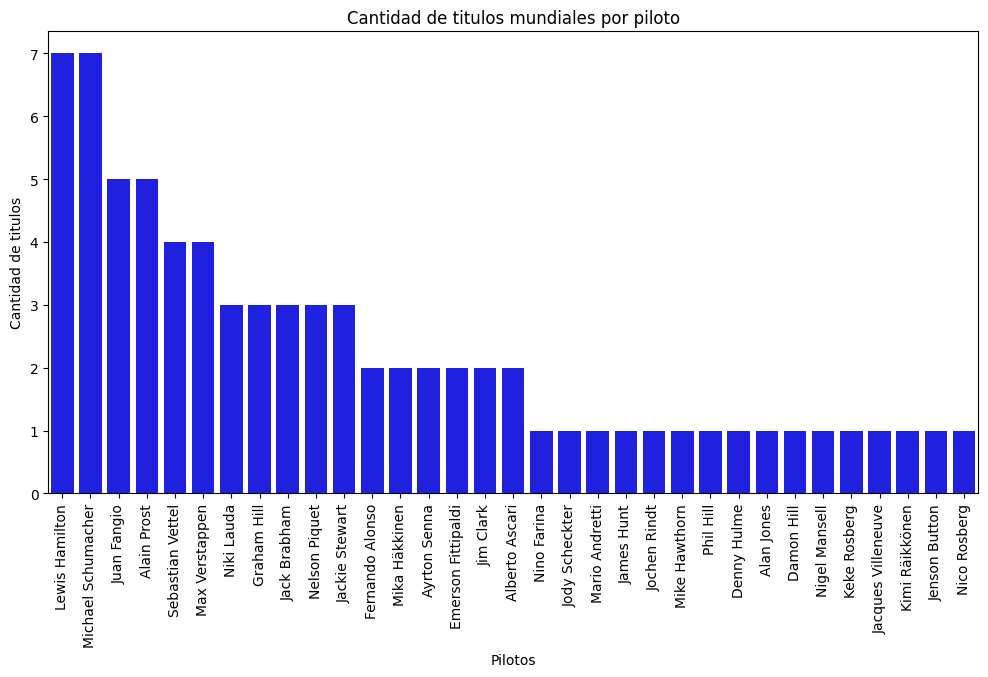

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x='driverName', y='world_championships_count', data=driver_championships_count, color='b')

plt.title('Cantidad de titulos mundiales por piloto')
plt.xlabel('Pilotos')
plt.ylabel('Cantidad de titulos')
plt.xticks(rotation=90)

plt.show()

The legendary **Michael Schumacher** and **Lewis Hamilton** lead the historical chart, followed by the Argentine **Juan Manuel Fangio**.



#### Decade-Based Analysis for Teams

We will now move on to analyzing team performance by decade.  
As a first step, we will group the seasons into **10-year intervals**, which will allow us to identify long-term trends and compare how different teams dominated (or struggled) across various eras of Formula 1.


In [49]:
df['decade'] = (df['year'] // 10) * 10
(df[['year', 'decade']].sample(5))

,year,decade
10785,1983,1980
4622,1996,1990
7377,1990,1990
1507,2005,2000
15359,1972,1970


##### Defining a Fair Metric for Cross-Era Comparisons

When analyzing Formula 1 performance across decades, one of the biggest challenges is the **evolution of the FIA scoring system**. Over the years, the points awarded per race and the number of drivers receiving points have changed multiple times, which makes raw points totals a poor basis for historical comparison.

To address this, instead of forcing all seasons into a single historical scoring format (e.g., the original 8-6-4-3-2 system), we will adopt a **percentage-based metric**:

- For each season, we calculate the **percentage of total possible points** that each driver achieved.  
- Then, at the constructor level, we aggregate the drivers’ percentages to represent the team’s relative dominance for that year.  

##### Why this approach?
- **Normalization across eras:** It removes the bias introduced by different scoring systems and varying numbers of races per season.  
- **Relative dominance:** A driver winning 70% of the available points in 1954 can be directly compared to one winning 70% in 2004, despite the different formats.  
- **Fairer representation:** This method highlights not just absolute totals, but how much of the championship each driver or team actually controlled within their season.  

This percentage-based approach allows for **more equitable and meaningful comparisons** across different eras of Formula 1.


In [52]:
df_points = df[df['points'] > 0]

total_points_per_season = df_points.groupby('year')['points'].sum().reset_index()
total_points_per_season.rename(columns={'points': 'total_points_per_season'}, inplace=True)
total_points_per_season.head()


,year,total_points_per_season
0,1950,168.00
1,1951,192.00
2,1952,192.00
3,1953,216.00
4,1954,215.56


In [53]:
points_per_decade = df.groupby(['constructorName', 'decade'])['points'].sum().reset_index()
points_per_decade.head()

,constructorName,decade,points
0,AFM,1950,0.0
1,AGS,1980,2.0
2,AGS,1990,0.0
3,ATS,1960,0.0
4,ATS,1970,2.0


In [54]:
total_points_per_decade = points_per_decade.groupby('decade')['points'].sum().reset_index()
total_points_per_decade.rename(columns={'points': 'total_points_decade'}, inplace=True)

points_pct_per_decade = points_per_decade.merge(total_points_per_decade, on='decade')
points_pct_per_decade['points_percentage'] = points_pct_per_decade['points'] / points_pct_per_decade['total_points_decade'] * 100

points_pct_per_decade = points_pct_per_decade[['constructorName', 'decade', 'points_percentage']]

points_pct_per_decade.head()


,constructorName,decade,points_percentage
0,AFM,1950,0.00000
1,AGS,1980,0.05162
2,AGS,1990,0.00000
3,ATS,1960,0.00000
4,ATS,1970,0.05596


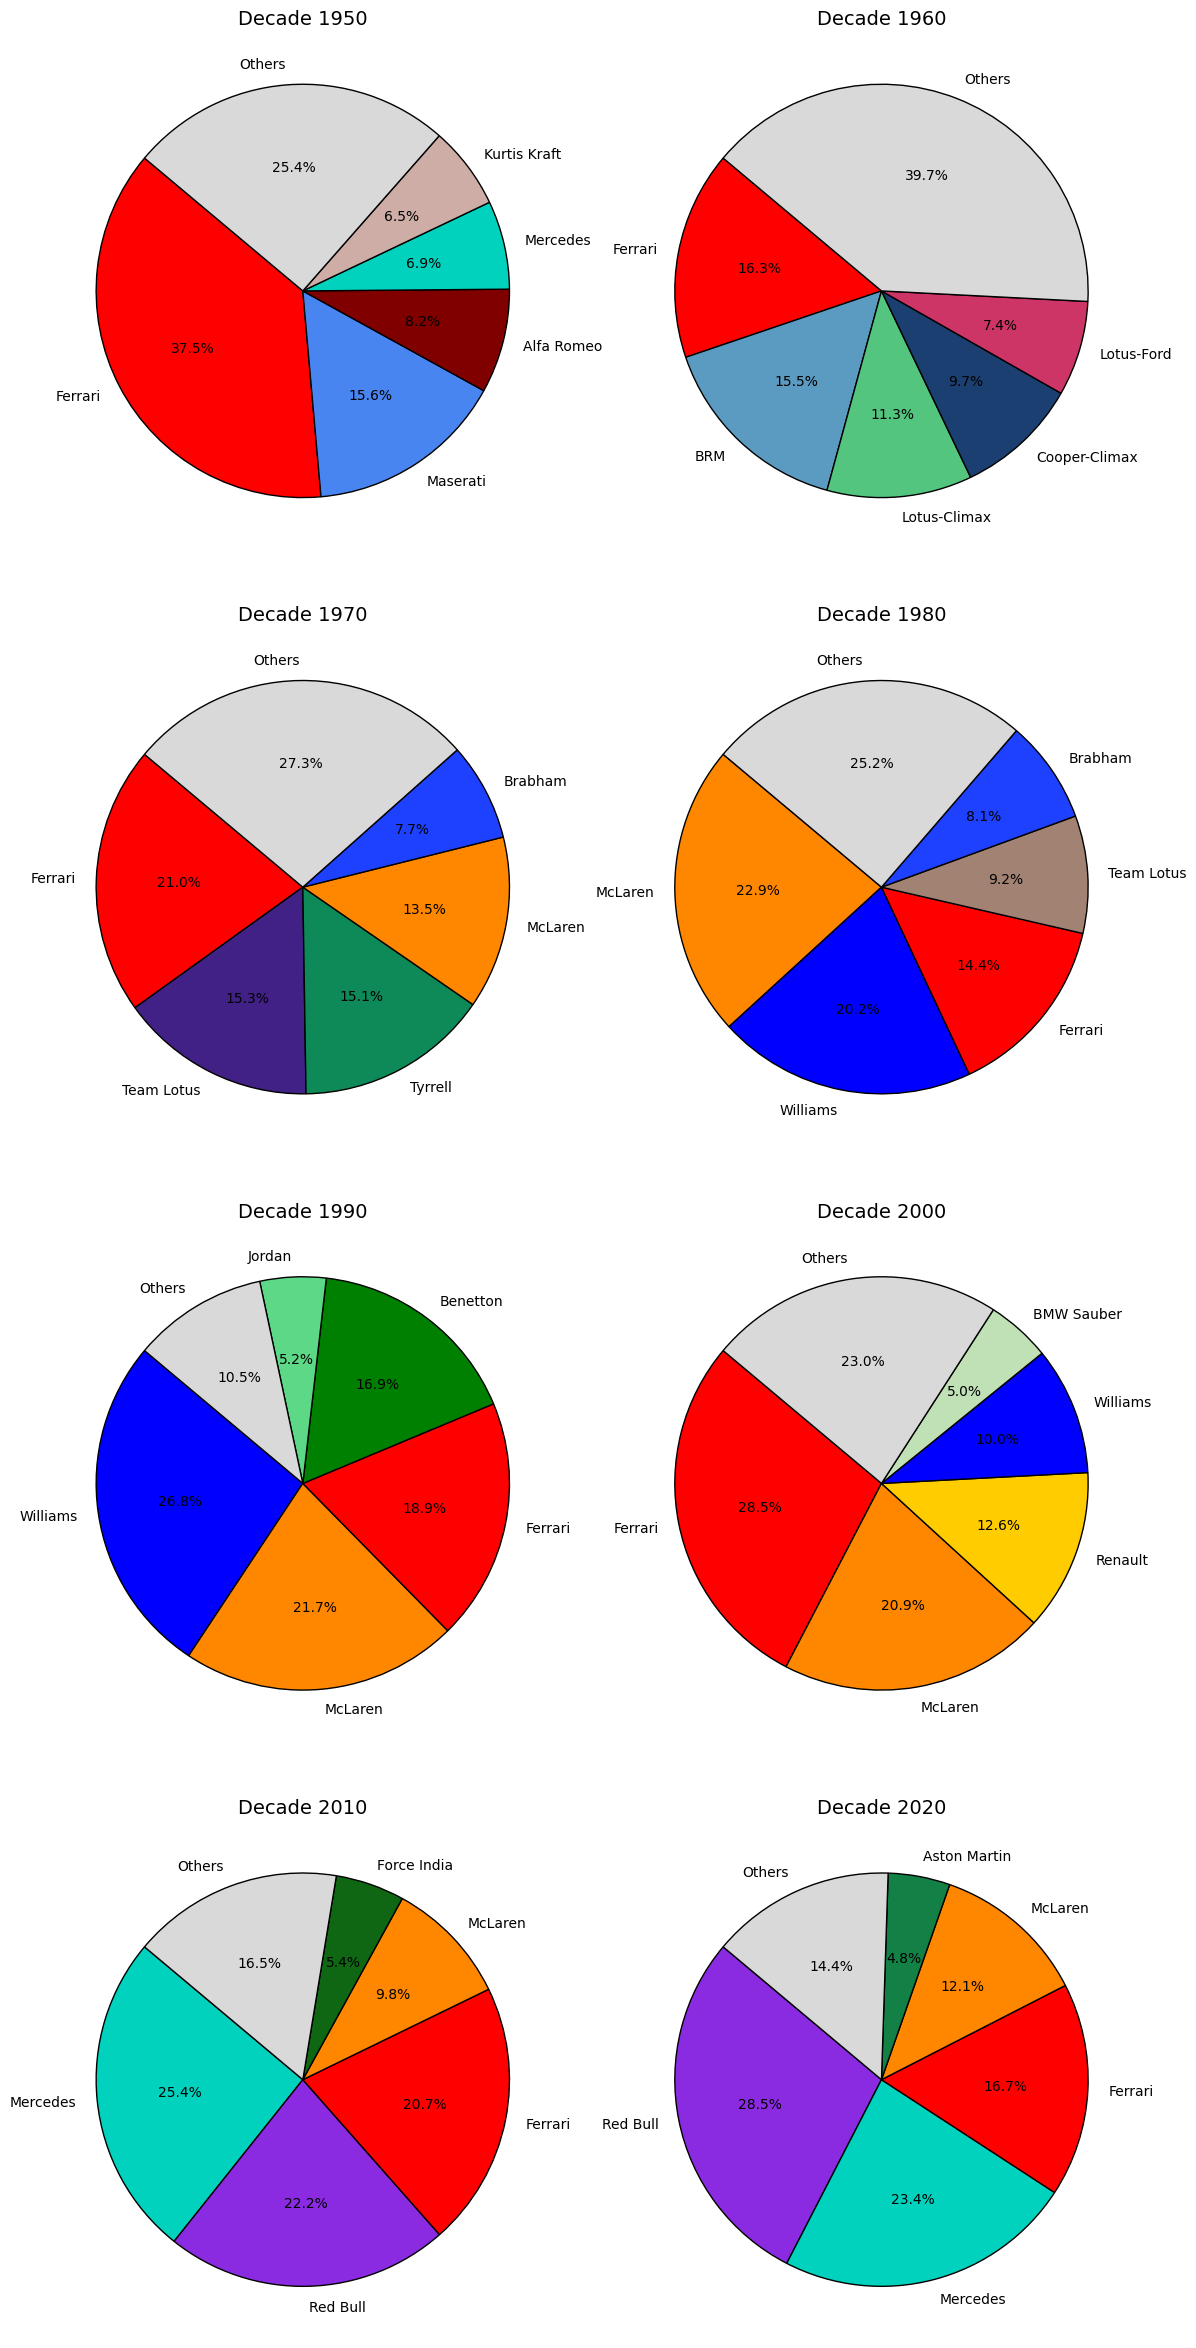

In [55]:
team_colors = {
    'Ferrari': '#ff0000',
    'McLaren': '#ff8700',
    'Williams': '#0000ff',
    'Brabham': '#1e41ff',
    'Mercedes': '#00d2be',
    'Renault': '#ffcc00',
    'Lotus': '#ffb3e6',
    'Benetton': '#008000',
    'Red Bull': '#8a2be2',
    'Alfa Romeo': '#800000'
}
other_color = '#d9d9d9'

def assign_colors(constructor_names):
    random_colors = ['#%06x' % np.random.randint(0, 0xFFFFFF) for _ in range(len(constructor_names))]
    return [
        team_colors.get(name, random_colors.pop()) if name != 'Others' else other_color
        for name in constructor_names
    ]

def plot_pie_charts(df, top_n=5):
    num_decades = len(df['decade'].unique())
    cols = 2
    rows = (num_decades + 1) // cols + (num_decades % cols > 0)

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, rows * 6))
    axes = axes.flatten()

    for i, decade in enumerate(sorted(df['decade'].unique())):
        df_decade = df[df['decade'] == decade]
        
        top_teams = df_decade.nlargest(top_n, 'points_percentage').set_index('constructorName')['points_percentage']
        
        others = df_decade[~df_decade['constructorName'].isin(top_teams.index)]['points_percentage'].sum()
        top_teams = pd.concat([top_teams, pd.Series({'Others': others})])
        
        colors = assign_colors(top_teams.index.tolist())
        
        wedges, texts, autotexts = axes[i].pie(
            top_teams, labels=top_teams.index, autopct='%1.1f%%', startangle=140,
            colors=colors, wedgeprops={'edgecolor': 'black'}
        )
        axes[i].set_title(f'Decade {decade}', fontsize=14)

    for j in range(len(df['decade'].unique()), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_pie_charts(points_pct_per_decade, top_n=5)


#### Conclusions

The pie charts for each decade show the **top 5 teams** that accumulated the most points according to our percentage-based metric.

From these charts, we can observe that **Ferrari** has consistently remained among the top teams across all decades. **McLaren** appears in six decades, **Williams** in four, and **Renault** also features in several periods. In more recent decades, **Mercedes** and **Red Bull** have emerged as dominant forces in the championship.


#### Historical Performance Analysis of Teams

We will now perform a deeper analysis to evaluate the **consistency and success** of the top teams throughout F1 history.



In [57]:
seasons_per_team = df.groupby('constructorName')['year'].nunique().reset_index()
seasons_per_team.rename(columns={'year': 'seasons'}, inplace=True)
seasons_per_team.head()

,constructorName,seasons
0,AFM,2
1,AGS,6
2,ATS,8
3,Adams,1
4,Alfa Romeo,16


In [58]:
# Calculate the number of seasons per constructor
seasons_per_team = df.groupby('constructorName')['year'].nunique().reset_index()
seasons_per_team.rename(columns={'year': 'seasons'}, inplace=True)

# Merge the seasons information into points_pct_per_decade
points_pct_per_decade = pd.merge(points_pct_per_decade, seasons_per_team, on='constructorName')

points_pct_per_decade.head()


,constructorName,decade,points_percentage,seasons
0,AFM,1950,0.00000,2
1,AGS,1980,0.05162,6
2,AGS,1990,0.00000,6
3,ATS,1960,0.00000,8
4,ATS,1970,0.05596,8


##### Scatter Plot Characteristics:

- **X-axis:** Number of seasons (`seasons`)  
- **Y-axis:** Average percentage of points per season (`average_points`)  
- **Point size:** Percentage of points (`points_percentage`) 

##### Insights from the Scatter Plot:

- Teams in the **top-right corner** have a high average and many seasons, indicating consistent high performance over time.  
- Teams in the **top-left corner** have a high average but fewer seasons, showing dominance in specific periods.  
- Teams towards the **bottom**, regardless of the number of seasons, have a low average, reflecting overall poor performance.

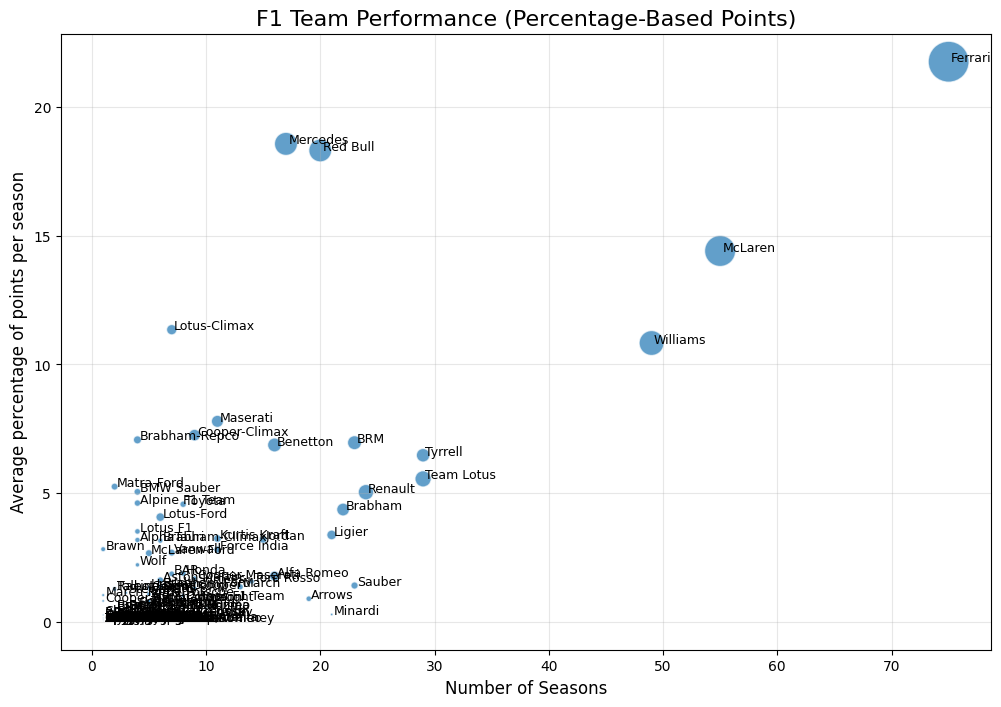

In [60]:
team_stats = points_pct_per_decade.groupby('constructorName').agg(
    total_points=('points_percentage', 'sum'),
    average_points=('points_percentage', 'mean')
).reset_index()

team_stats = pd.merge(team_stats, seasons_per_team, on='constructorName')

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    team_stats['seasons'],
    team_stats['average_points'],
    s=team_stats['total_points'] * 5,
    alpha=0.7,
    edgecolors='w'
)

for i, row in team_stats.iterrows():
    plt.text(row['seasons'] + 0.2, row['average_points'], row['constructorName'], fontsize=9)

plt.title('F1 Team Performance (Percentage-Based Points)', fontsize=16)
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Average percentage of points per season', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


#### Conclusions

**Ferrari** is undoubtedly the team with the most seasons in F1 and demonstrates the greatest consistency over the years. **McLaren** and **Williams** also show considerable consistency, particularly given that they have more than 48 seasons in the championship.  

Looking at the top-left of the scatter plot, we see **Mercedes** and **Red Bull**, teams with fewer seasons but outstanding performance, as indicated by their high average percentage of points per season.


#### 🎯 Topic 2: Relationship Between Drivers, Teams, and Circuits  
**Imagine a marketing department hires us to determine the best sponsorship strategy for the Monaco Grand Prix.**  
They want to sponsor the most likely winner but are unsure whether to choose a specific team or a driver.  
Let's analyze this scenario. *(Media & Sponsorship Analytics)*  

- First, we'll filter our dataframe to keep only the races that took place at 'Circuit de Monaco'. Then, we'll focus on the teams and drivers from the last 5 years.


In [61]:
df_mónaco = df[(df['circuitName'] == 'Circuit de Monaco') & (df['year'] >= 2019)]
df_mónaco.head()

,resultId,raceId,driverName,constructorName,grid,positionText,points,circuitName,year,grandPrixName,decade
24300,24306,1015,Lewis Hamilton,Mercedes,1,1,25.0,Circuit de Monaco,2019,Monaco Grand Prix,2010
24301,24307,1015,Sebastian Vettel,Ferrari,4,2,18.0,Circuit de Monaco,2019,Monaco Grand Prix,2010
24302,24308,1015,Valtteri Bottas,Mercedes,2,3,15.0,Circuit de Monaco,2019,Monaco Grand Prix,2010
24303,24309,1015,Max Verstappen,Red Bull,3,4,12.0,Circuit de Monaco,2019,Monaco Grand Prix,2010
24304,24310,1015,Pierre Gasly,Red Bull,8,5,11.0,Circuit de Monaco,2019,Monaco Grand Prix,2010


- Let's see which drivers have accumulated the most points at this circuit.


In [62]:
df_puntos = df_mónaco.groupby('driverName')['points'].sum().loc[lambda x: x > 0].sort_values(ascending=False)
df_puntos.head()

driverName
Max Verstappen     85.0
Carlos Sainz       63.0
Lewis Hamilton     56.0
Charles Leclerc    45.0
Lando Norris       38.0
Name: points, dtype: float64

C:\Users\eze_g\AppData\Local\Temp\ipykernel_15100\3953865925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_puntos.index, y=df_puntos.values, palette="Blues_d")


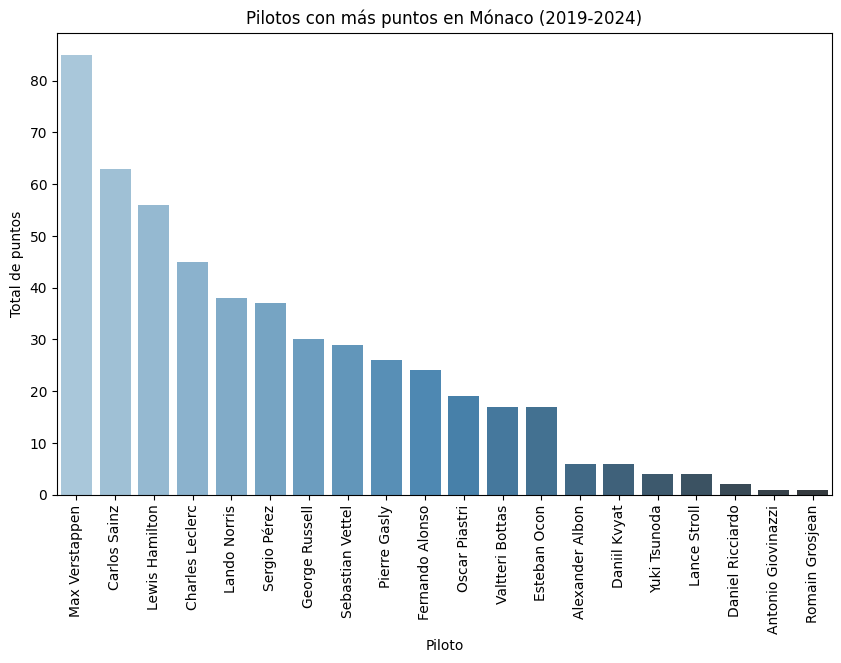

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_puntos.index, y=df_puntos.values, palette="Blues_d")
plt.title('Pilotos con más puntos en Mónaco (2019-2024)')
plt.xlabel('Piloto')
plt.ylabel('Total de puntos')
plt.xticks(rotation=90)
plt.show()


#### Conclusions

**Max Verstappen** (Red Bull) emerges as the top choice, followed by **Carlos Sainz** (joining Williams next season), **Lewis Hamilton** (signed with Ferrari for 2025), and **Charles Leclerc** (Ferrari).


- Let's take a look at the teams to see if they match with any of these drivers.


In [64]:
df_puntos_equipos = df_mónaco.groupby('constructorName')['points'].sum().loc[lambda x: x > 0].sort_values(ascending=False)
print(df_puntos_equipos)

constructorName
Red Bull          133.0
Ferrari           118.0
Mercedes          101.0
McLaren            65.0
Aston Martin       33.0
Alpine F1 Team     30.0
Toro Rosso         10.0
AlphaTauri          8.0
RB F1 Team          4.0
Alfa Romeo          3.0
Renault             2.0
Williams            2.0
Haas F1 Team        1.0
Name: points, dtype: float64


C:\Users\eze_g\AppData\Local\Temp\ipykernel_15100\3708061929.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_puntos_equipos.index, y=df_puntos_equipos.values, palette="Reds_d")


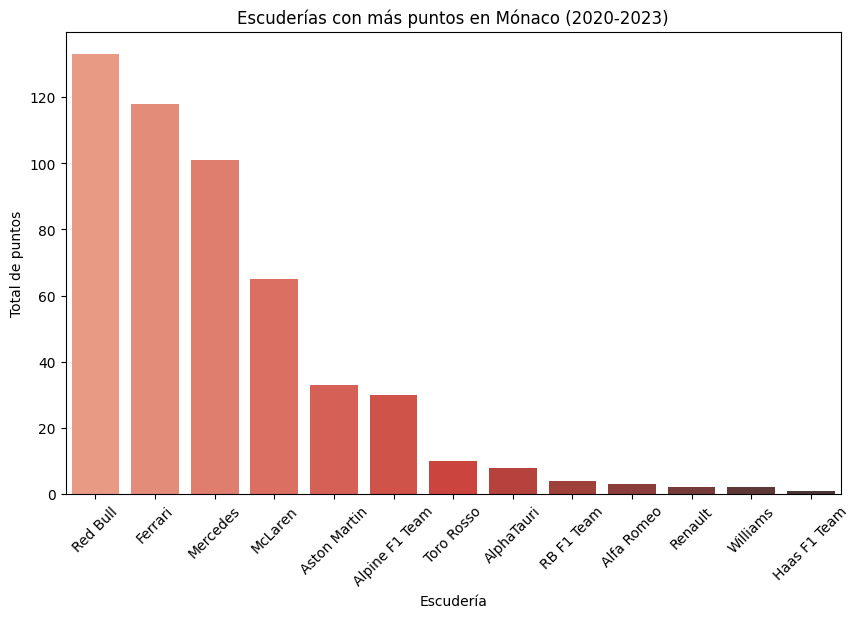

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_puntos_equipos.index, y=df_puntos_equipos.values, palette="Reds_d")
plt.title('Escuderías con más puntos en Mónaco (2020-2023)')
plt.xlabel('Escudería')
plt.ylabel('Total de puntos')
plt.xticks(rotation=45)
plt.show()

#### Conclusion

**Red Bull** comes first, led by their driver **Max Verstappen**, making them the top choice for sponsorship. If that is not possible, **Ferrari**, with either **Hamilton** or **Leclerc**, could be considered.  

On the other hand, **Carlos Sainz** has just signed with **Williams**, a team that has historically underperformed at this circuit and accumulated only a few points. Therefore, he would not be a suitable option.
